In [1]:
import matplotlib 
# matplotlib.use('Agg') 
 
import PID 
import time 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
# from scipy.interpolate import spline 


def convert_error_to_time_exp(error):
    mul = 2.851
    e = 4.3523
    return (mul*math.e**(e*error))

def convert_error_to_time_exp_decreasing(error):
    mul = 13.5379
    e = -3.7221
    return (mul*math.e**(e*error))

def convert_error_to_time_lin(error):
    mul = 54.091
    ad = 22.136
    return (mul*error+ad)

def convert_curr_consumption_to_voltage_drop(time) :
    Iactive = 3.3
    Isleep = .00235
    v = (Iactive+time*Isleep)/500
    return v

def convert_error_to_time_const(error):
    return (20)

def convert_error_to_time_const_60(error):
    return (60)

P = 1
I = 0.0001 
D = 0.0001 
pid = PID.PID(P, I, D) 
 
pid.SetPoint = 4
pid.setSampleTime(0.1) 
 
def simulate_pid(time_function, current_voltage, pid):
    feedback_list = [] 
    time_list = [] 
    setpoint_list = [] 
    error_list = []
    period_list = []
    print("simulating....") 
    i=0
    a = time.time()
    prev_period=0
    while(1):
        pid.update(current_voltage) 
        output = pid.output 
        period = time_function(output)
        vd = convert_curr_consumption_to_voltage_drop(period)
        print("Vd: ",vd,"Output: ",output, "Feedback: ", current_voltage, "Feedback + Output: ", current_voltage+output, "Period: ", period)
        if(current_voltage<3.3):
            break
        current_voltage-=vd
        # time.sleep(period/100) 
        time.sleep(0.2)
        feedback_list.append(current_voltage) 
        setpoint_list.append(pid.SetPoint) 
        time_list.append(period) 
        error_list.append(output)
        period_list.append(prev_period+period)
        prev_period = period_list[-1]
        i+=1
    b = time.time()-a

    return feedback_list, setpoint_list, time_list, error_list, period_list, b

In [2]:
feedback_lin_list, setpoint_list, time_lin_list, error_lin_list, period_lin_list, time_ran_lin =simulate_pid(convert_error_to_time_lin, 4.4,pid)   
pid.SetPoint = 4
pid.setSampleTime(0.1) 

feedback_const_list, setpoint_list, time_const_list, error_const_list, period_const_list, time_ran_const = simulate_pid(convert_error_to_time_const, 4.4,pid)  
pid.clear() 
pid.SetPoint = 4
pid.setSampleTime(0.1) 
feedback_const_list_60, setpoint_list, time_const_list_60, error_const_list_60, period_const_list_60, time_ran_const_60 = simulate_pid(convert_error_to_time_const_60, 4.4,pid)   
pid.SetPoint = 4
pid.setSampleTime(0.1) 
feedback_exp_list, setpoint_list, time_exp_list, error_exp_list, period_exp_list, time_ran_exp = simulate_pid(convert_error_to_time_exp, 4.4,pid)   
pid.SetPoint = 4
pid.setSampleTime(0.1) 

feedback_exp_dec_list, setpoint_list, time_exp_dec_list, error_exp_dec_list, period_exp_dec_list, time_ran_exp_dec =simulate_pid(convert_error_to_time_exp_decreasing, 4.4,pid)   
pid.SetPoint = 4
pid.setSampleTime(0.1) 


simulating....
Vd:  0.006704039199999999 Output:  0.0 Feedback:  4.4 Feedback + Output:  4.4 Period:  22.136
Vd:  0.006604010001370402 Output:  -0.3934630200784494 Feedback:  4.393295960800001 Feedback + Output:  3.9998329407215514 Period:  0.8531917809365908
Vd:  0.006605727760731057 Output:  -0.38670624510603285 Feedback:  4.38669195079863 Feedback + Output:  3.999985705692597 Period:  1.2186724959695745
Vd:  0.006607405182907628 Output:  -0.38010813570815455 Feedback:  4.380086223037899 Feedback + Output:  3.9999780873297444 Period:  1.5755708314102108
Vd:  0.006609083065507476 Output:  -0.37350821524375044 Feedback:  4.373478817854991 Feedback + Output:  3.9999706026112407 Period:  1.9325671292502946
Vd:  0.006610761407259597 Output:  -0.36690648871229226 Feedback:  4.366869734789484 Feedback + Output:  3.9999632460771917 Period:  2.2896611190633998
Vd:  0.006612440211738923 Output:  -0.3603029420518586 Feedback:  4.360258973382225 Feedback + Output:  3.999956031330366 Period:  2.6

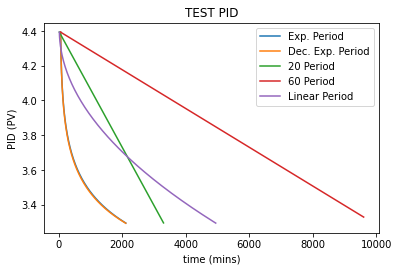

In [7]:
fig1 = plt.gcf() 
fig1.subplots_adjust(bottom=0.15) 
 
plt.plot(period_exp_list, feedback_exp_list,label='Exp. Period') 
plt.plot(period_exp_list[:len(feedback_exp_dec_list)], feedback_exp_dec_list,label='Dec. Exp. Period') 
plt.plot(period_const_list, feedback_const_list[:len(period_const_list)],label='20 Period') 
plt.plot(period_const_list_60, feedback_const_list[:len(period_const_list_60)],label='60 Period') 
plt.plot(period_lin_list, feedback_lin_list[:len(period_lin_list)],label='Linear Period') 
 
plt.xlabel('time (mins)') 
plt.ylabel('PID (PV)') 
plt.title('TEST PID') 
plt.legend()
 

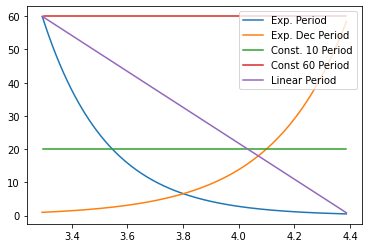

In [4]:
# fig= plt.gcf()
# fig.subplots_adjust(bottom=0.15) 
plt.plot(feedback_exp_list[1:],time_exp_list[1:], label='Exp. Period')
plt.plot(feedback_exp_dec_list[1:],time_exp_dec_list[1:], label='Exp. Dec Period')
plt.plot(feedback_const_list[1:],time_const_list[1:], label='Const. 10 Period')
plt.plot(feedback_const_list_60[1:],time_const_list_60[1:],label='Const 60 Period')
plt.plot(feedback_lin_list[1:],time_lin_list[1:], label='Linear Period')
plt.legend()

In [6]:
print(time_lin_list[0], time_lin_list[0], error_lin_list[0])
print(len(feedback_lin_list), len(feedback_const_list))
sum_value=sum(time_lin_list)
print("Average: ",sum_value/len(time_lin_list))

22.136 22.136 0.0
164 165
Average:  30.143658884428515
